## Goal of this notebook

It might be possible that low scores are due to less pre-processing. So I would like to try
PCA on the entire dataset to see whether this would produce better acuuracy scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
np.random.seed(73)

In [2]:
df=pd.read_csv('Vectorised_Data.csv')#read vectorised df
df.head()

,is_sarcastic,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len,abort,abus,accept,...,INTJ_proportion,X_proportion,AUX_proportion,CCONJ_proportion,PART_proportion,PROPN_proportion,PUNCT_proportion,ADJ_proportion,SCONJ_proportion,VERB_proportion
0,0.0,12.0,12.0,78.0,2.0,2.0,5.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.400000,0.0,0.100000
1,0.0,14.0,14.0,84.0,6.0,3.0,5.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.0,0.125000,0.0,0.000000
2,1.0,14.0,13.0,79.0,4.0,1.0,4.714286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.111111,0.0,0.222222
3,1.0,13.0,13.0,84.0,5.0,2.0,5.538462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.333333
4,0.0,11.0,11.0,64.0,3.0,2.0,4.909091,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.428571,0.0,0.000000,0.0,0.142857


In [3]:
print(df.shape) #shape
df.isnull().sum().sum()#nulls

(26703, 1023)


0

### train test split

In [4]:
y = df.is_sarcastic
X = df[[cols for cols in df.columns if cols != "is_sarcastic"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.20, stratify=y)

### Standard Scaling

In [6]:
# initialize
ss = StandardScaler()

# fit on Train
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),
                          columns = X_train.columns,
                          index = X_train.index)

# transform test
X_test_ss = pd.DataFrame(ss.transform(X_test),
                         columns = X_test.columns,
                         index = X_test.index)

### PCA on all columns

In [7]:
pca = PCA().fit(X_train_ss)

In [8]:
for i, l in enumerate(pca.explained_variance_):
    print('PC {}: {:.2f} --> {:.2f}%'.format(i, l,
                                             l * 100 / sum(pca.explained_variance_)))

PC 0: 3.59 --> 0.35%
PC 1: 3.33 --> 0.33%
PC 2: 2.99 --> 0.29%
PC 3: 2.95 --> 0.29%
PC 4: 2.90 --> 0.28%
PC 5: 2.86 --> 0.28%
PC 6: 2.78 --> 0.27%
PC 7: 2.68 --> 0.26%
PC 8: 2.58 --> 0.25%
PC 9: 2.55 --> 0.25%
PC 10: 2.44 --> 0.24%
PC 11: 2.44 --> 0.24%
PC 12: 2.38 --> 0.23%
PC 13: 2.37 --> 0.23%
PC 14: 2.37 --> 0.23%
PC 15: 2.34 --> 0.23%
PC 16: 2.29 --> 0.22%
PC 17: 2.23 --> 0.22%
PC 18: 2.23 --> 0.22%
PC 19: 2.18 --> 0.21%
PC 20: 2.12 --> 0.21%
PC 21: 2.08 --> 0.20%
PC 22: 1.96 --> 0.19%
PC 23: 1.94 --> 0.19%
PC 24: 1.89 --> 0.18%
PC 25: 1.86 --> 0.18%
PC 26: 1.82 --> 0.18%
PC 27: 1.81 --> 0.18%
PC 28: 1.78 --> 0.17%
PC 29: 1.76 --> 0.17%
PC 30: 1.74 --> 0.17%
PC 31: 1.73 --> 0.17%
PC 32: 1.71 --> 0.17%
PC 33: 1.70 --> 0.17%
PC 34: 1.69 --> 0.17%
PC 35: 1.68 --> 0.16%
PC 36: 1.66 --> 0.16%
PC 37: 1.65 --> 0.16%
PC 38: 1.63 --> 0.16%
PC 39: 1.63 --> 0.16%
PC 40: 1.61 --> 0.16%
PC 41: 1.61 --> 0.16%
PC 42: 1.60 --> 0.16%
PC 43: 1.59 --> 0.16%
PC 44: 1.59 --> 0.16%
PC 45: 1.58 --> 0.15

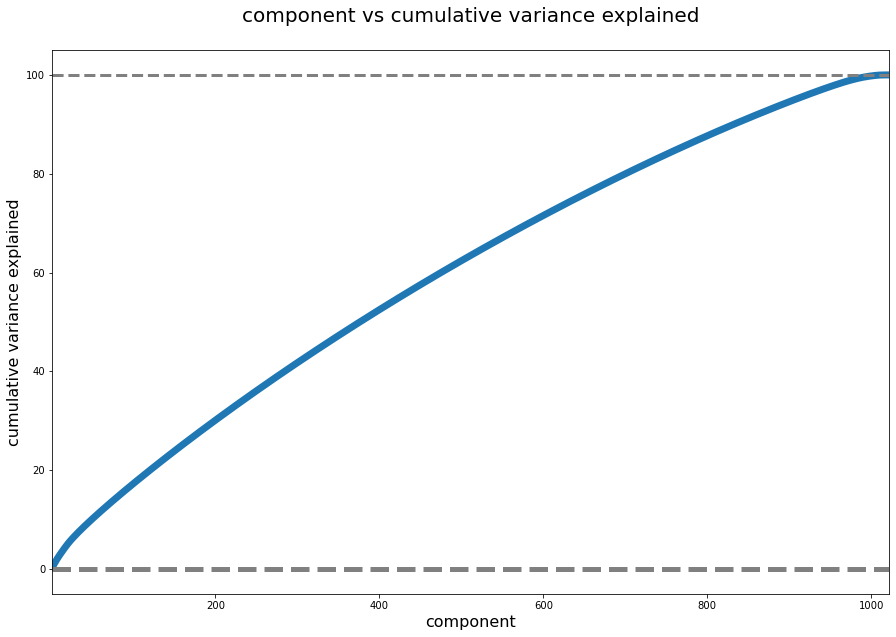

In [9]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(15,10))
component_number = range(1, 1023)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,1022])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);

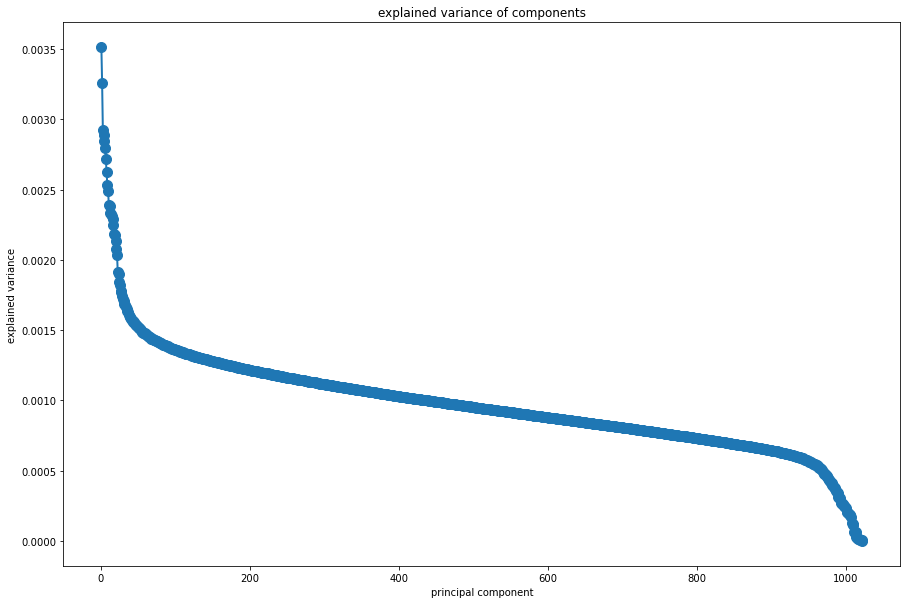

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(range(1,1023), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1,1023), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

**Observations:** 

- Not that we can use some of the specific features here.
- So will use entire PCAed dataframe to run a RandomForest model.

In [11]:
pca_df_train = pd.DataFrame(pca.transform(X_train_ss),
                      columns=['pc_' + str(i) for i in range(1022)])
pca_df_train.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_1012,pc_1013,pc_1014,pc_1015,pc_1016,pc_1017,pc_1018,pc_1019,pc_1020,pc_1021
0,-0.734463,-1.127826,0.143572,-0.307207,0.136097,-0.355199,-0.496120,-0.112455,0.116993,0.341420,...,0.031831,0.007234,0.005695,-0.000041,0.011867,0.010376,-0.000565,0.003891,0.001518,6.878740e-16
1,4.194659,8.209453,-4.658386,-1.106959,-4.743961,-1.071855,-0.540397,-0.097758,0.529418,-0.571952,...,0.301040,0.005626,-0.009773,-0.002191,-0.038778,0.000933,-0.001555,-0.097744,-0.000739,2.619221e-16
2,-0.010582,0.997315,0.103529,0.258564,0.021608,0.397965,0.711241,0.198537,-0.472578,-0.863348,...,-0.006170,-0.002021,-0.004749,-0.007829,0.065339,-0.001124,0.003855,0.006761,-0.001954,-2.773399e-16
3,3.578913,-0.971435,-0.423895,-0.272556,-0.076637,-0.395072,-0.461395,-0.129898,0.585238,0.628956,...,0.014691,-0.007102,-0.006272,-0.014326,-0.353604,0.010693,-0.002071,0.304943,-0.000668,3.646081e-16
4,0.953549,-0.071617,-0.049328,-0.027314,-0.127147,-0.253173,0.300678,-0.286897,0.204605,-0.051809,...,0.047324,-0.061097,-0.004830,0.003125,0.057865,0.001891,0.001610,-0.028957,0.005086,-5.882209e-16


In [12]:
pca_df_test = pd.DataFrame(pca.transform(X_test_ss),
                      columns=['pc_' + str(i) for i in range(1022)])
pca_df_test.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_1012,pc_1013,pc_1014,pc_1015,pc_1016,pc_1017,pc_1018,pc_1019,pc_1020,pc_1021
0,2.665478,-0.834881,-0.292111,-0.171668,-0.015885,-0.329871,-0.250482,-0.101755,0.317968,0.116886,...,0.025769,-0.001579,0.002266,0.002179,0.040463,0.004000,0.002049,-0.026230,-0.004337,2.819364e-17
1,-2.509245,-1.446562,-0.094348,-0.368462,-0.095934,-0.639411,-0.312541,-0.245778,0.632262,-0.124137,...,0.034255,-0.000907,0.018359,-0.023186,-0.262836,0.005075,-0.001648,0.060873,0.007105,2.146869e-15
2,0.458661,-1.211666,-0.147585,-0.312902,-0.022854,-0.455960,-0.358964,0.021021,0.401347,0.198763,...,0.029672,-0.007309,-0.018772,-0.015081,-0.168823,0.004591,-0.012695,-0.061827,-0.015255,-1.597795e-15
3,-1.733079,-0.425147,0.204798,-0.213824,0.029465,-0.028493,-0.042780,0.029031,0.543507,-0.137505,...,-0.157510,0.001544,0.005317,-0.000927,-0.049953,-0.004919,-0.006410,-0.082270,-0.001668,-1.271439e-15
4,-1.860421,-0.080677,-0.061872,0.376223,-0.001524,0.070815,0.325618,0.199154,-0.144860,-0.742297,...,-0.018687,-0.005341,-0.010816,0.018819,0.065965,-0.002288,-0.006125,0.020411,-0.001893,7.971483e-16


In [13]:
print('Nulls in training data: {}'.format(pca_df_train.isnull().sum().sum()))
print('Nulls in test data: {}'.format(pca_df_test.isnull().sum().sum()))

Nulls in training data: 0
Nulls in test data: 0


In [14]:
def rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth):
   
    '''Gridsearching RandomForest'''
    
#     X = df.drop(target_col, axis=1)   # predictors
#     y = df[target_col]                # target
    
#     X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                        y, test_size = test_size, random_state=42) # TT split
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    

    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

In [15]:
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

In [ ]:
n_estimators = list(range(11,1021,20))
max_depth = list(range(1, 30, 2)) 
rfscore2(pca_df_train, pca_df_test, y_train, y_test,n_estimators,max_depth)

Fitting 5 folds for each of 765 candidates, totalling 3825 fits
